In [51]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

In [52]:
wave_path = "audio_data/Kanon D dur (Qurtet) - V.A.mp3"
waveform, sample_rate = librosa.load(wave_path, sr=None) 
print(f"Audio loaded: {len(waveform)} samples at {sample_rate}Hz")

Audio loaded: 13247640 samples at 44100Hz


In [53]:
n_fft = 1024 # 傅里叶变换时的计算窗口长度（单位：采样点）
hop_size = 512
waveform_stft = librosa.stft(y = waveform, n_fft = n_fft, hop_length = hop_size)

In [54]:
def plot_waveform(waveform, sr, title="Waveform"):
    waveform = np.array(waveform)
    samples = len(waveform)
    time_scale = np.linspace(0, samples/sr, samples)
    plt.figure(figsize=(20, 10))
    plt.plot(time_scale, waveform, linewidth=1)
    plt.title(title)
    plt.grid(True) # 网格
    plt.show()


def plot_waveform_fft(waveform, sr, n_fft, title="Waveform FFT"):
    # 取前n_fft个样本进行分析
    segment = waveform[:n_fft]
    waveform_fft = np.fft.rfft(segment, n=n_fft)
    magnitude = np.abs(waveform_fft)
    freq_scale = np.fft.rfftfreq(n=n_fft, d=1.0/sr)
    plt.figure(figsize=(20, 10))
    plt.plot(freq_scale, magnitude, linewidth=1)
    plt.title(title)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()

def plot_spectrogram(spectrogram, sr, hop_length, title="Spectrogram(dB)"):
    plt.figure(figsize=(20, 10))
    # 使用specshow并设置正确的参数
    librosa.display.specshow(
        librosa.amplitude_to_db(np.abs(spectrogram), ref=np.max),
        sr=sr,
        hop_length=hop_length,
        x_axis='time',
        y_axis='hz'
    )
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Frequency (Hz)')
    plt.show()



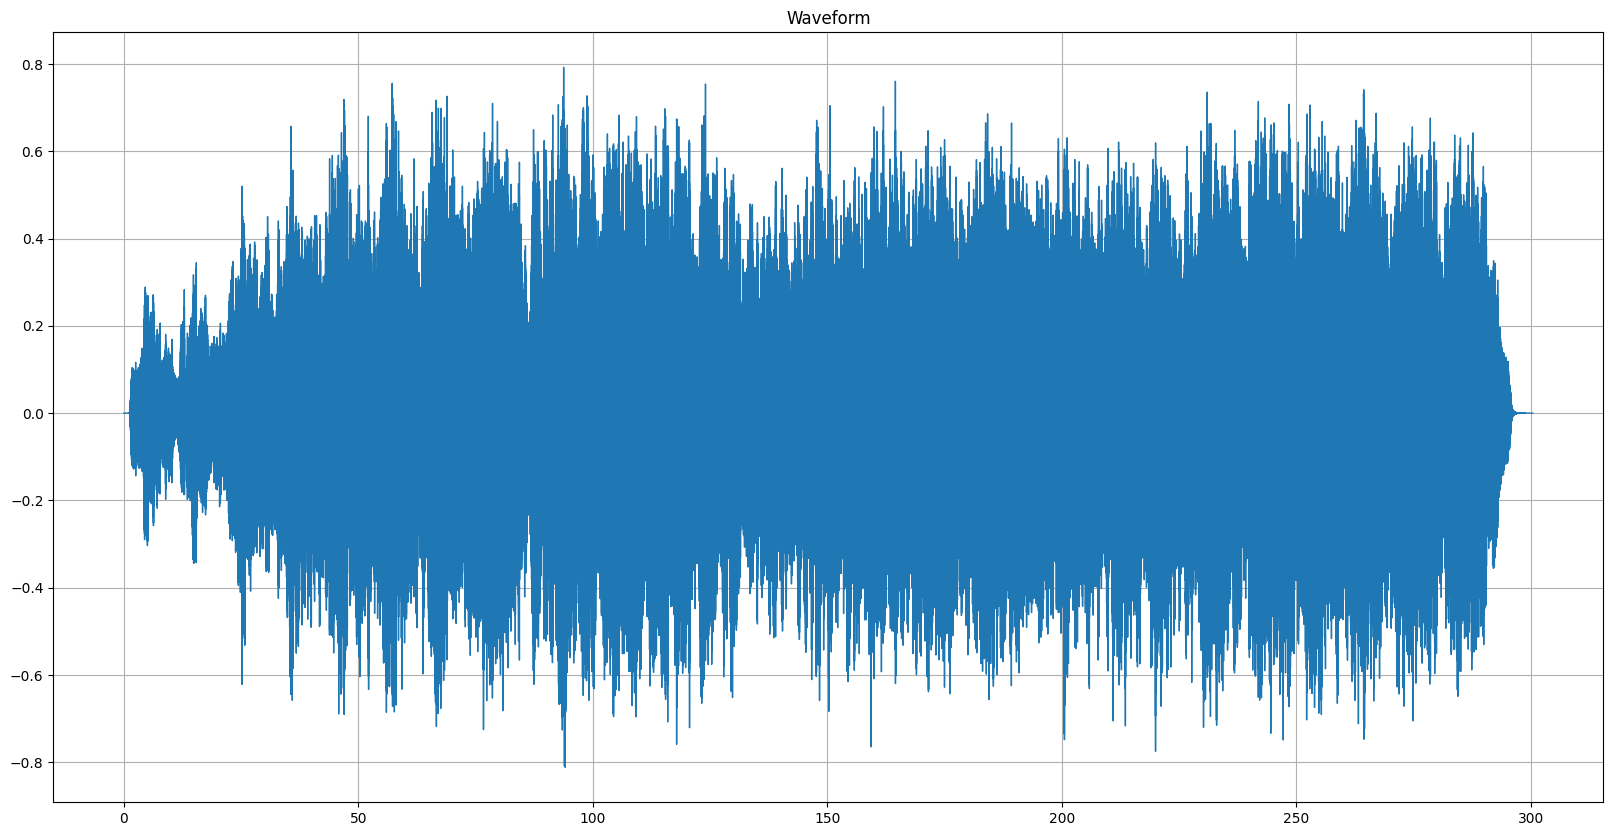

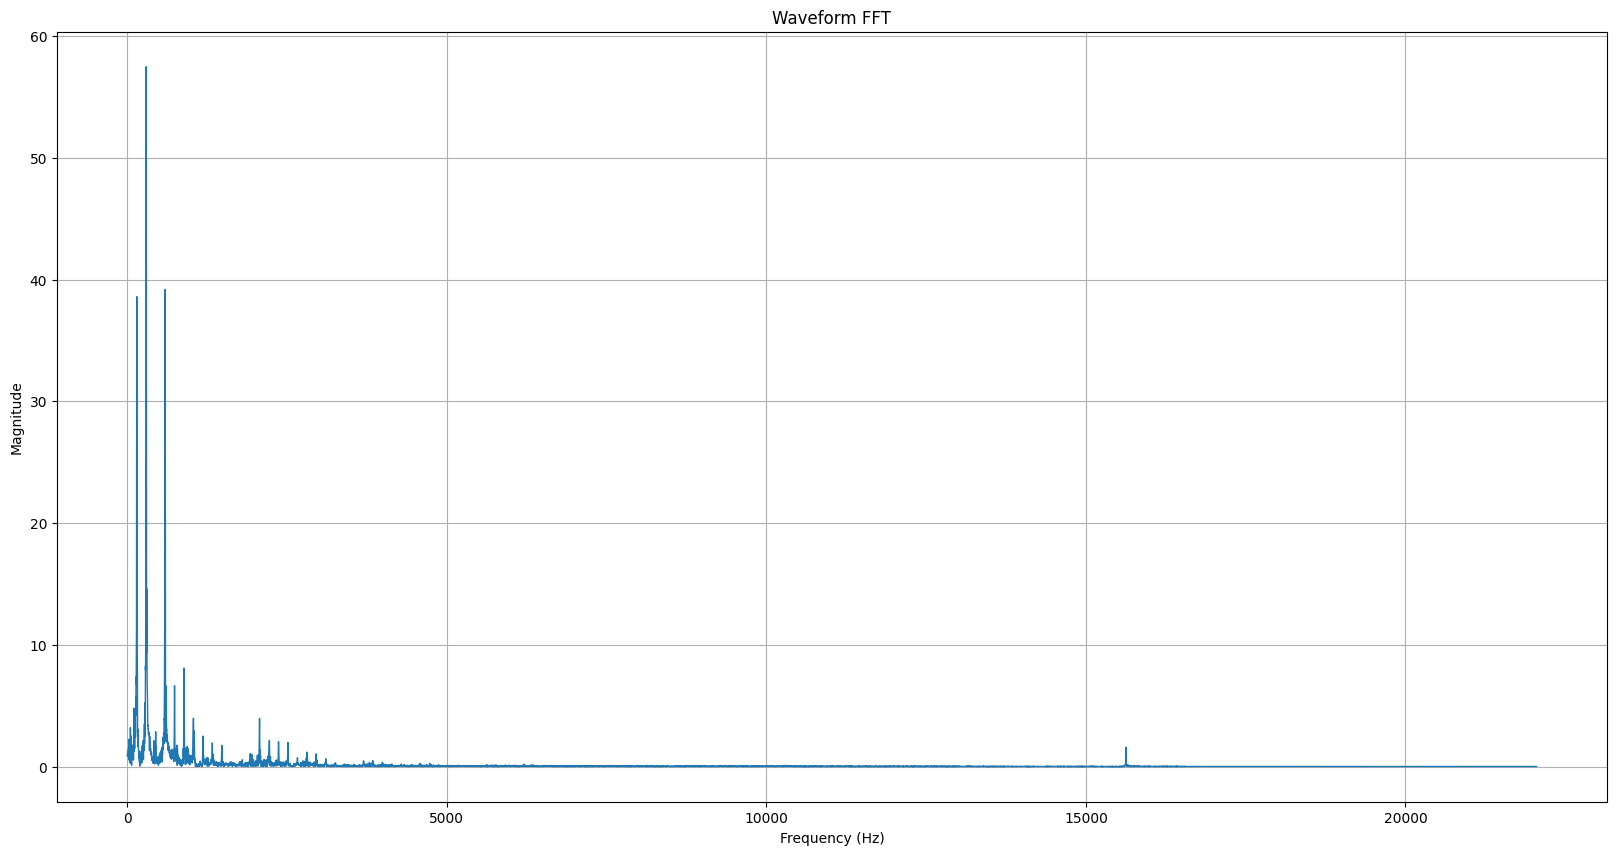

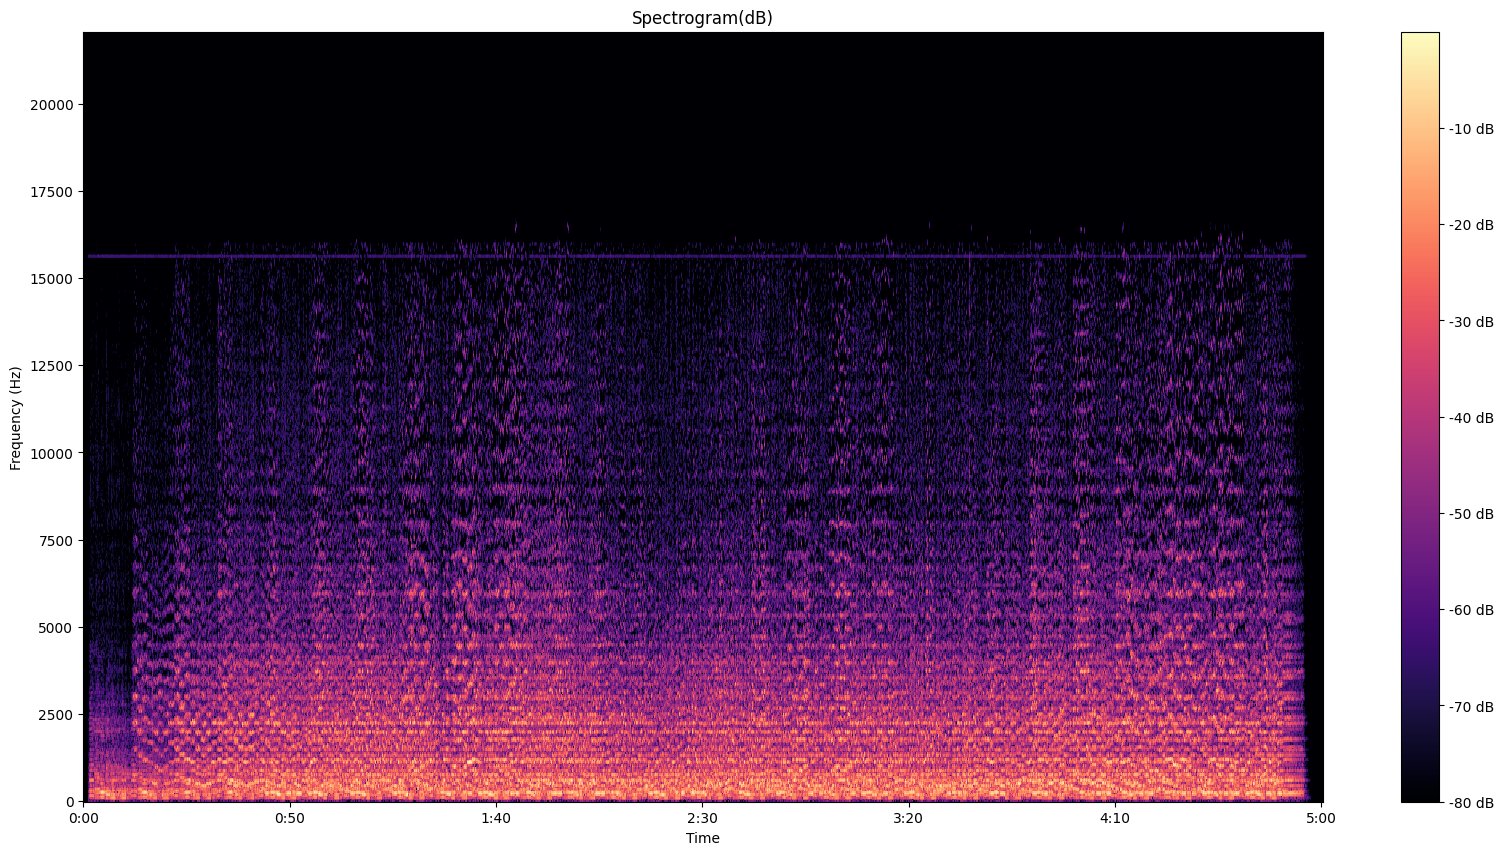

In [55]:
plot_waveform(waveform, sample_rate)
plot_waveform_fft(waveform, sample_rate, n_fft=1024*64)
plot_spectrogram(np.abs(waveform_stft), sample_rate, hop_length=hop_size)